# CPSC 483 Intro to Machine Learning Project 1
### By: Jeremy Rico

Dataset: male400.csv - data collected from Olympic trials of mens 400m dash times from the years 1896 - 2008

In this program we will approach the dataset with a few different machine learning approaches to extrapolate the data. We will use a few different type of regression as seen below and determine which method best fits the data.
1. Linear
2. 3rd order polynomial
3. 5th order polynomial

We will then ad L2 regularization to the code to fit a 5th order polynomial and do some experimenting with hyperparameters (particularly the learning rate) to see which model best fits the data.
    

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import csv

### Average Squared Loss function
Works according to the following equation:
$$\frac{1}{N}\displaystyle\sum_{n=1}^{N} (t_n - y_n)^2$$
Where $t_n$ is the target value and $y_n$ is the predicted value obtained using the appropriate regression function: $$ y_n = f(x; w_0, w_1, ... w_n) $$

In [13]:
# simple function to calculate average squared loss between two arrays; target and predicted
def avgSqrdLoss(targets, predictions):
    loss = targets - predictions
    return np.multiply(loss, loss).mean()

Read in data from .csv file and store in np arrays

In [4]:
data = np.genfromtxt('male400.csv', delimiter = ',', skip_header=1)
years = data[:, 0]
times = data[:, 1]

## 1. Load the data from male400.csv and create a scatter plot similar to Figure 1.1 in the textbook. Does the relationship appear to be linear?

Text(0.5, 1.0, 'Olympic Mens 400m Times')

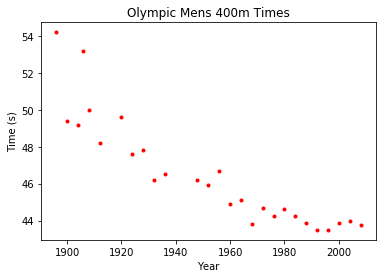

In [5]:
plt.plot(years, times, 'r.', label='Raw')
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title('Olympic Mens 400m Times')


A: The data does not appear to be linear. It appears to be more of an exponential curve that will eventually level out. From the data below it appears that the curve will approach 40s in the years to come.

## 2. Use linear regression to fit a line to the data. Add the line to the scatterplot as in Figure 1.5 in the textbook. Compute the loss for the linear model.

## Linear Regression Model
Linear model calculated using the following method:

$$y = \hat{w_{0}}+ \hat{w_{1}}*x$$

$$\hat{w_{0}} = \bar{t} - \hat{w_{1}} * \bar{x}$$

$$\hat{w_{1}} = \frac{\bar{xt} - (\bar{x} * \bar{t})} {\bar{x^2} - \bar{x}^2}$$

In this case, our target value (t) is the recorded times, and the independent varibale (x) is the year so:

In [8]:
# calculate relevant variables
x_bar = years.mean()
t_bar = times.mean()
x_bar_2 = x_bar**2
x_2_bar = np.multiply(years, years).mean()
xt_bar = np.multiply(years,times).mean()

w1_hat = (xt_bar - (x_bar * t_bar)) / (x_2_bar - x_bar_2) 
w0_hat = t_bar - (w1_hat * x_bar)

# plug in values to linear regression model
y_linregress = w1_hat * years + w0_hat

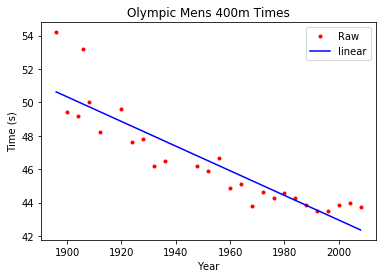

In [9]:
# Plot linear regression model with raw scatter plot
plt.plot(years, times, 'r.', label='Raw')
plt.plot(years, y_linregress, 'b-', label='linear')
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.title('Olympic Mens 400m Times')
plt.legend()

### Calculate loss for linear model

In [18]:
linLoss = avgSqrdLoss(times, y_linregress)
print(linLoss)

1.5780331724469312
